In [1]:
from src.generator import Encoder, Decoder, Generator, Discriminator, Pix2Pix
from src.Dataset import ImageDataset
import torch
import matplotlib.pyplot as plt
import glob

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = ImageDataset('../data/base', transform=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1,
                                         shuffle=True, num_workers=2)

In [11]:
gen = Generator(in_channels=3, out_channels=3)
disc = Discriminator(in_channels=6)
pix2pix = Pix2Pix(gen, disc)

In [ ]:
dir(gen)

In [ ]:
for param in gen.parameters():
    print(param.shape)

In [95]:
pix2pix.load_state_dict(torch.load("/data/model_190.torch", map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
pix2pix.train(5,dataloader)

In [ ]:
gen_img = pix2pix(dataset[1][0][None,:,:,:])

In [ ]:
dataset[1][0].shape

In [ ]:
torch.ones(2)

In [ ]:
for data in dataloader:
    print(data[0].shape, data[1].shape)

In [ ]:
len(dataset)

In [ ]:
img=dataset[0][0]

In [ ]:
img.shape

In [ ]:
img.float().dtype

In [ ]:
gen = Generator()

In [ ]:
disc(inp).shape

In [ ]:
img.float()[None, :,:,:].shape

In [ ]:
from PIL import Image

In [ ]:
img.numpy().shape

In [ ]:
gen_img = gen_img.detach().numpy()

In [ ]:
gen_img = gen_img[0,:,:,:]

In [ ]:
gen_img.shape

In [ ]:
img = dataset[1][0]

In [ ]:
import numpy as np
np.min(gen_img)

In [ ]:
img = Image.open('../CMP_facade_DB_base/base/cmp_b0001.png')

In [ ]:
img  = img.convert("RGB")

In [ ]:
torch(img).shape

In [ ]:
img = img.numpy()
img = img.T

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(gen_img)

In [38]:
def plot_images(dataset, model, idx):
    img_in = dataset[idx][0]
    img_out = dataset[idx][1]
    gen_img = model(img_in[None,:,:,:])
    gen_img = gen_img.detach().numpy()
    gen_img = gen_img[0,:,:,:].T
    fig, axs = plt.subplots(1,3, figsize=(10,6))
    img_in = img_in.numpy().T
    img_out = img_out.numpy().T
    axs[0].imshow(img_in.transpose([1,0,2]))
    axs[0].set_title('Input')
    axs[1].imshow(gen_img.transpose([1,0,2]))
    axs[1].set_title('Generated')
    axs[2].imshow(img_out.transpose([1,0,2]))
    axs[2].set_title("Original")
    for ax in axs:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    

In [16]:
from PIL import Image
from torchvision.transforms import PILToTensor, RandomCrop
import numpy as np

In [17]:
random_crop = RandomCrop((256, 256))

In [18]:
img = PILToTensor()(Image.open('../data/base/cmp_b0001.jpg').convert('RGB'))

In [21]:
crp1 = random_crop(img)
crp2 = random_crop(img)

In [23]:
(crp1==crp2).sum()

tensor(1769)

In [24]:
crp2.shape

torch.Size([3, 256, 256])

In [25]:
256*256*3

196608

In [ ]:
img.shape

In [ ]:
np.array(img).max()

In [ ]:
img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


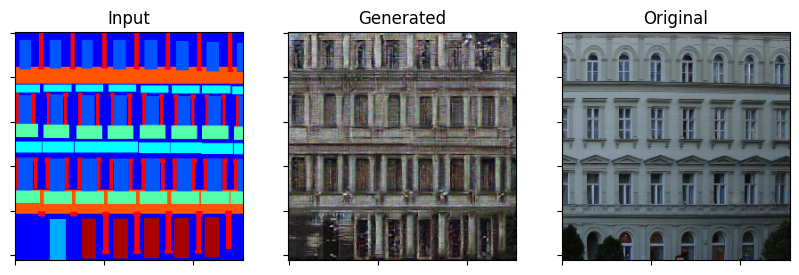

In [102]:
plot_images(dataset, pix2pix,28)

In [ ]:
plt.figure()
plt.hist(dataset[0][1][0].ravel())

TypeError: Invalid shape (3, 256, 256) for image data

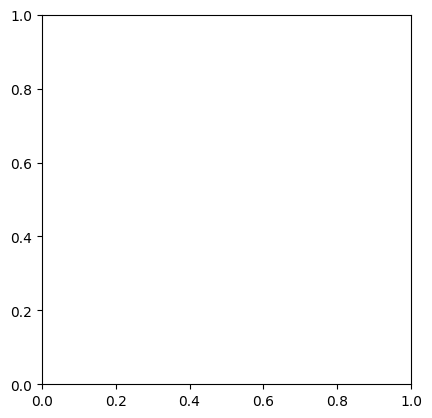

In [9]:
plt.figure()
plt.imshow(dataset[10][1])

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('/data/logs')


In [ ]:
writer.add_graph(pix2pix, img_batch[0])

In [ ]:
pix2pix

In [ ]:
img=dataset[0][0].numpy()

In [ ]:
img=img.t

In [ ]:
img.transpose([1,0,2]).shape

In [ ]:
img.T.shape

In [ ]:
img.shape

In [ ]:
img = Image.fromarray(img[:,:,0], mode='L')

In [ ]:
img

In [ ]:
img

In [ ]:
import numpy as np
np.array(img).shape

In [ ]:
import glob

In [ ]:
import os
glob.glob(os.path.join('../CMP_facade_DB_base/base','/*.png'))

In [ ]:
os.path.join('../CMP_facade_DB_base/base','/*.png')

In [ ]:
disc = Discriminator()

In [ ]:
disc.training

In [ ]:
disc

In [ ]:
import torch

In [ ]:
inp = torch.rand([1,1,256, 256])
#inp2 = torch.rand([1,2,1024,1024])


In [ ]:
out = gen(inp)

In [ ]:
out.shape

In [ ]:
out = disc(inp)

In [ ]:
out.shape

In [ ]:
gen = Generator()

In [ ]:
out = gen(inp)

In [ ]:
enc = Encoder()

In [ ]:
enc

In [ ]:
out = [enc.enc_blocks[0](inp)]
for en in enc.enc_blocks[1:]:
    out.append(en(out[-1]))

In [ ]:
dec = Decoder()

In [ ]:
out[-1].shape

In [ ]:
decoded=dec(out)

In [ ]:
decoded.shape

In [ ]:
import pandas as pd
df = pd.read_csv("not_complex_claims.csv")

In [ ]:
df = df.sort_values('claim_evaluation_id')
df = df.dropna(subset=['trigger'])

In [ ]:
df = df.fillna({'complexity':"None",'suggested_complexity':"None", 'comment':""})
df['context'] = df['context'].str.replace('\n',' ')

In [ ]:
func = lambda x: '###'.join(x)
func_newline = lambda x: '\n'.join(x)
df = df.groupby(['claim_evaluation_id']).agg({'action': func,
                                                        'trigger': func,
                                                        'keywords': func,
                                                        'context': func_newline,
                                                        'complexity': lambda x:  x.iloc[0],
                                                        'suggested_complexity': lambda x: x.iloc[0],
                                                        'comment': lambda x: x.iloc[0],
                                                         'claim_id': lambda x: x.iloc[0],
                                                         'date_created': lambda x: x.iloc[0]}).reset_index()

In [ ]:
df = df[['claim_id','action','trigger','keywords','context','complexity']]

In [ ]:
df.shape

In [ ]:
df['action'] = df['action'].apply(lambda x: ','.join(list(set(x.split('###')))))
df['trigger'] = df['trigger'].apply(lambda x: ','.join(list(set(x.split('###')))))
df['keywords'] = df['keywords'].apply(lambda x: ','.join(list(set(x.split('###')))))
df['context'] = df['context'].apply(lambda x: '\n'.join(list(set(x.split('\n')))))



In [ ]:
df[df['comment']!='']

In [ ]:
df[df['claim_evaluation_id']==8007]['context'].iloc[0]

In [ ]:
df.trigger.info()

In [ ]:
df